# DEEP LEARNING [TURMA 01B] - 2021/2
## Trilha 8: Tarefa (Peso 3)

In [785]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from IPython.display import display
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

columns = ['CLASS', 'AGE','SEX','STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE','ANOREXIA','LIVER BIG', 'LIVER FIRM',
           'SPLEEN PALPABLE', 'SPIDERS','ASCITES','VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT','ALBUMIN', 'PROTOTIPE','HISTOLOGY']
dados = pd.read_csv(r'D:\Python_Estudos\Estudos de Python\hepatitis.data', header=None)
dados.columns=columns

In [786]:
# tratando os dados

dados.replace('?', np.nan,inplace=True)
dados.dropna(inplace=True)

# Trocando os valores de Class para 0 e 1.
dados['CLASS'] = dados.CLASS.map({1:0,2:1})

In [787]:
# Expondo como ficou o tratamento dos dados
dados.head()

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTOTIPE,HISTOLOGY
5,1,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
10,1,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
11,1,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
12,1,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
13,1,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1


In [788]:
# Avaliando o Shape dos Dados
dados.shape

(80, 20)

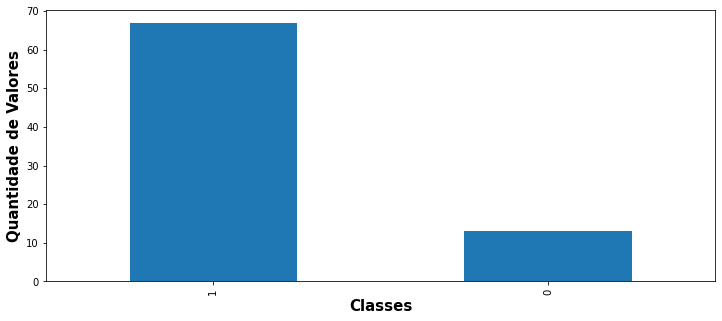

In [789]:
# Verificando o Balanceamento do DATASET
plt.figure(figsize=(12,5))
plt.ylabel("Quantidade de Valores", fontsize=15, fontweight='bold')
plt.xlabel("Classes", fontsize=15, fontweight='bold')
dados['CLASS'].value_counts().plot(kind='bar')
plt.show()

In [790]:
# Resolvendo esse problema de desbalanceamento com a técnica OVER-SAMPLING

ros = RandomOverSampler(random_state=123)

X_resample, y_resample = ros.fit_resample(dados.drop(labels=['CLASS'],axis=1),dados['CLASS'])

# Concatenando os dados Resampleados com OverSample
dados_resample = pd.concat([X_resample,y_resample],axis=1)

In [791]:
# Verificando o Shape dos dados antigos e Novos
print(f"Os dados anteriores tinham {dados.shape[0]} linhas e {dados.shape[1]} colunas.")
print(f"Os dados modificados têm {dados_resample.shape[0]} linhas e {dados_resample.shape[1]} colunas.")

Os dados anteriores tinham 80 linhas e 20 colunas.
Os dados modificados têm 134 linhas e 20 colunas.


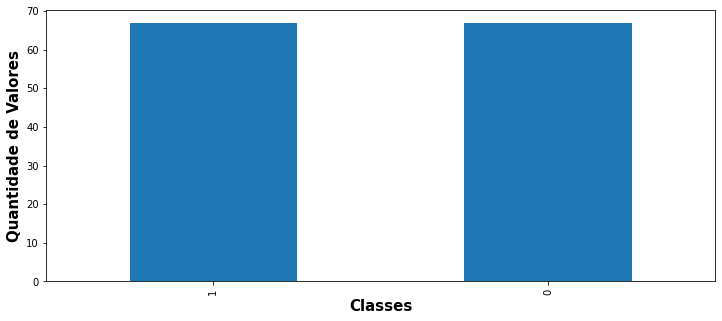

In [792]:
# Verificando o Balanceamento do DATASET após as modificações
plt.figure(figsize=(12,5))
plt.ylabel("Quantidade de Valores", fontsize=15, fontweight='bold')
plt.xlabel("Classes", fontsize=15, fontweight='bold')
dados_resample['CLASS'].value_counts().plot(kind='bar')
plt.show()

## MODELO DEEP LEARNING

### Preparando os dados

In [793]:
# Separando os dados de treinamento do Conjunto de Dados Modificado

X_train, X_test, y_train, y_test = train_test_split(dados_resample.drop(labels=['CLASS'],axis=1),dados_resample['CLASS'],
                                                    test_size=0.3, random_state=123)

display(X_train.head())
display(y_train.head())

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTOTIPE,HISTOLOGY
100,39,1,1,1,1,1,2,2,1,2,2,2,2,2.30,280,98,3.8,40,1
74,47,1,2,2,1,1,2,2,1,2,1,1,1,1.00,166,30,2.6,31,2
102,59,1,1,2,1,1,2,2,1,1,1,2,2,1.50,107,157,3.6,38,2
65,34,2,2,2,1,1,1,1,1,2,1,2,2,0.70,70,24,4.1,100,2
21,35,1,2,2,1,2,2,2,2,2,2,2,2,0.90,58,92,4.3,73,1


100    0
74     0
102    0
65     1
21     1
Name: CLASS, dtype: int64

### Declarando as camadas

In [794]:
model = keras.Sequential([
    layers.Dense(19, activation='tanh', input_shape=[19]),
    layers.Dense(1, activation='tanh'),
])

In [795]:
model.summary()

Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_550 (Dense)           (None, 19)                380       
                                                                 
 dense_551 (Dense)           (None, 1)                 20        
                                                                 
Total params: 400
Trainable params: 400
Non-trainable params: 0
_________________________________________________________________


### Compilando o Modelo

In [796]:
model.compile(
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

### Treinando o Modelo

In [797]:
history = model.fit(
    np.asarray(X_train).astype(np.float32), np.asarray(y_train).astype(np.float32),
    batch_size=32,
    validation_split=0.3,
    epochs=30,
    verbose=0,
)

### Curva de Aprendizado

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,2.262958,0.323077,2.244814,0.500000
1,1.840499,0.353846,1.352665,0.535714
2,1.256395,0.307692,1.279844,0.607143
3,0.956784,0.384615,1.267597,0.607143
4,0.934638,0.369231,1.263024,0.642857


Best Validation Loss: 0.6689
Best Validation Accuracy: 0.6429


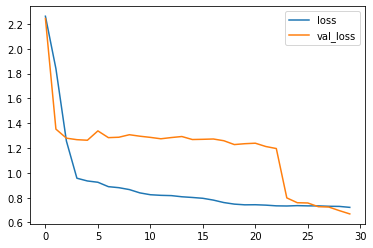

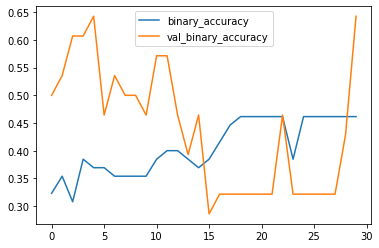

In [798]:
def display_hist(history):
    history_df = pd.DataFrame(history.history)
    display(history_df.head())

    # Plotando os Gráficos
    history_df.loc[0:, ['loss', 'val_loss']].plot()
    history_df.loc[0:,['binary_accuracy', 'val_binary_accuracy']].plot()

    print(("Best Validation Loss: {:0.4f}" "\nBest Validation Accuracy: {:0.4f}"\
          .format(history_df['val_loss'].min(),
                  history_df['val_binary_accuracy'].max())))

    return

display_hist(history)

In [799]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def print_results(y_test, y_pred):
    mc = pd.DataFrame(confusion_matrix(y_test,y_pred), index=['Atual: Não', 'Atual: Sim'],
                      columns=['Predição: Não', 'Predição: Sim'])
    display(mc)
    class_report = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True)).transpose()
    display(class_report)
    print(f"Acuracidade: {round(accuracy_score(y_test,y_pred)* 100,2)} %")
    return

In [800]:
y_pred = model.predict(np.asarray(X_test).astype(np.float32)) > 0.5

In [801]:
print_results(np.asarray(y_test).astype(np.float32),y_pred)

,Predição: Não,Predição: Sim
Atual: Não,12,6
Atual: Sim,16,7


,precision,recall,f1-score,support
0.0,0.428571,0.666667,0.521739,18.000000
1.0,0.538462,0.304348,0.388889,23.000000
accuracy,0.463415,0.463415,0.463415,0.463415
macro avg,0.483516,0.485507,0.455314,41.000000
weighted avg,0.490217,0.463415,0.447213,41.000000


Acuracidade: 46.34 %


## Utilizando o KERAS TUNER

### Importando a Biblioteca

In [802]:
import keras_tuner as kt

### Preparando os dados

In [803]:
# Separando os dados de treinamento do Conjunto de Dados Modificado

X_train, X_test, y_train, y_test = train_test_split(dados_resample.drop(labels=['CLASS'],axis=1),dados_resample['CLASS'],
                                                    test_size=0.3, random_state=123)

### Definindo o Modelo

In [804]:
from keras.layers import Dropout
def model_builder(hp):
    hp_units_1 = hp.Int('hp_units_1', min_value=4, max_value=128, step=4)
    model = keras.Sequential(layers.Dense(units=hp_units_1, activation='tanh', input_shape=[X_train.shape[1]]))

    for i in range(hp.Int('num_layers', 2, 6)):
        model.add(Dropout(0.20))
        model.add(layers.Dense(units=hp.Int('hp_units_' + str(i),
                                            min_value=4,
                                            max_value=256,
                                            step=4),
                               activation='elu'))
    model.add(layers.Dense(1,activation='tanh'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])
    return model

## Tunning

In [805]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=50,
                     factor=3,)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [806]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val-loss', patience=5)
tuner.search(np.asarray(X_train).astype(np.float32), np.asarray(y_train).astype(np.float32),
             batch_size=64,
             epochs=50,
             validation_split=0.2,
             callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [807]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [808]:
print(f"""
The hyperparameter search is complete.

The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

print('Best layers units: \n')
for i in range(2,6):
    print('Layer: ', i-1, ' , ', best_hps.get('hp_units_' + str(i)), ' units')


The hyperparameter search is complete.

The optimal learning rate for the optimizer is 0.001.

Best layers units: 

Layer:  1  ,  252  units
Layer:  2  ,  40  units
Layer:  3  ,  180  units
Layer:  4  ,  92  units


In [809]:
# Construindo um modelo com os melhores hiperparâmetros
model = tuner.hypermodel.build(best_hps)

history = model.fit(np.asarray(X_train).astype(np.float32), np.asarray(y_train).astype(np.float32),
                    batch_size=64,
                    epochs=50,
                    validation_split=0.2,
                    verbose=0)

val_acc_per_epoch = history.history['val_loss']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 3


In [810]:
# Aplicando ao Modelo Final
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(np.asarray(X_train).astype(np.float32), np.asarray(y_train).astype(np.float32),
               batch_size=64,
               epochs=best_epoch,
               validation_split=0.2)

eval_result = hypermodel.evaluate(np.asarray(X_test).astype(np.float32), np.asarray(y_test).astype(np.float32))
print("[test loss, test accuracy]:", eval_result)

Epoch 1/3
2/2 [==============================] - 0s 92ms/step - loss: 1.5813 - binary_accuracy: 0.5676 - val_loss: 1.3431 - val_binary_accuracy: 0.3158
Epoch 2/3
2/2 [==============================] - 0s 15ms/step - loss: 0.9725 - binary_accuracy: 0.5000 - val_loss: 1.6640 - val_binary_accuracy: 0.3158
Epoch 3/3
2/2 [==============================] - 0s 2ms/step - loss: 0.9553 - binary_accuracy: 0.5610
[test loss, test accuracy]: [0.955276608467102, 0.5609756112098694]


In [811]:
y_pred = model.predict(np.asarray(X_test).astype(np.float32)) > 0.5

In [812]:
print_results(np.asarray(y_test).astype(np.float32),y_pred)

,Predição: Não,Predição: Sim
Atual: Não,12,6
Atual: Sim,3,20


,precision,recall,f1-score,support
0.0,0.800000,0.666667,0.727273,18.000000
1.0,0.769231,0.869565,0.816327,23.000000
accuracy,0.780488,0.780488,0.780488,0.780488
macro avg,0.784615,0.768116,0.771800,41.000000
weighted avg,0.782739,0.780488,0.777230,41.000000


Acuracidade: 78.05 %


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,5.628724,0.472973,0.712013,0.578947
1,0.996866,0.513514,1.079320,0.315789
2,0.877702,0.459459,1.317172,0.315789
3,0.914715,0.540541,1.257319,0.315789
4,0.979720,0.500000,1.034854,0.315789


Best Validation Loss: 0.4161
Best Validation Accuracy: 0.8947


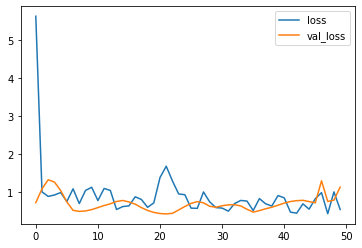

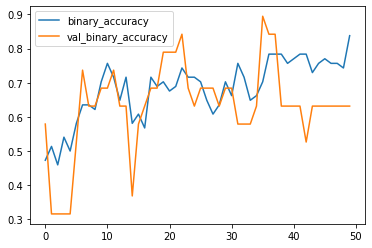

In [813]:
display_hist(history)

### Conclusão

O Modelo apresentou um desempenho *superior* ao outro modelo treinado manualmente.

Local do Respositório: https://github.com/willianpina/Deep_Learning_Estudos/blob/main/Trilha%208%20-%20Deep%20Learning%20-%20Ajustado.ipynb